In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import discriminant_analysis as da
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read and preview dataset
dataset = pd.read_csv('covtype.data', names=list(range(55)))
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
#categorical wilderness for element [0,]
dataset.iloc[0,10:14]
#categorical wilderness for element [6000,]
dataset.iloc[6000,10:14]
#categorical solil type for element[0,]
dataset.iloc[0,14:54]
#categorical solil type for element[6000,]
dataset.iloc[6000,14:54]

14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
Name: 6000, dtype: int64

In [4]:
# Split dataset for train- test and scale
y_train = dataset.iloc[:15120,(dataset.shape[1]-1)]
y_test = dataset.iloc[15120:,(dataset.shape[1]-1)]

scaler = MinMaxScaler().fit(dataset.iloc[:15120,:(dataset.shape[1]-1)])
X_train = scaler.transform(dataset.iloc[:15120,:(dataset.shape[1]-1)])
X_test= scaler.transform(dataset.iloc[15120:,:(dataset.shape[1]-1)])
#Normalized data used for Logistic regression because of the penalty (L2)

/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
# Logistic Regression
# solver = lbfgs
logr = lm.LogisticRegression(penalty='l2' ,C = 1.0, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 10000,tol = 1e-3, verbose=1)
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)
logr_accuracy1 = np.mean(y_test == yhat)
print("Logistic Regression Accuracy (lbfgs): %f" % logr_accuracy1)
# n_iter_ : Actual number of iterations for all classes and I choose the max
max(logr.n_iter_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s finished


Logistic Regression Accuracy (lbfgs): 0.585149


423

In [6]:
# Logistic Regression
# solver = saga
logr = lm.LogisticRegression(penalty='l2' ,C = 1.0, multi_class = 'multinomial', solver = 'saga', max_iter = 10000,tol = 1e-3, verbose=1)
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)
logr_accuracy2 = np.mean(y_test == yhat)
print("Logistic Regression Accuracy (saga): %f" % logr_accuracy2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Logistic Regression Accuracy (saga): 0.585082


In [7]:
# Logistic Regression
# solver = sag
logr = lm.LogisticRegression(penalty='l2' ,C = 1.0, multi_class = 'multinomial', solver = 'sag', max_iter = 10000,tol = 1e-3, verbose=1)
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)
logr_accuracy3 = np.mean(y_test == yhat)
print("Logistic Regression Accuracy (sag): %f" % logr_accuracy3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 23 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


Logistic Regression Accuracy (sag): 0.585069


In [8]:
# Logistic Regression
# solver = liblinear
logr = lm.LogisticRegression(penalty='l2' ,C = 1.0, solver = 'liblinear', max_iter = 10000,tol = 1e-3, verbose=1)
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)
logr_accuracy4 = np.mean(y_test == yhat)
print("Logistic Regression Accuracy (liblinear): %f" % logr_accuracy4)
# n_iter_ : Actual number of iterations for all classes and I choose the max
max(logr.n_iter_)

/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]Logistic Regression Accuracy (liblinear): 0.561363


9

In [9]:
# Logistic Regression
# solver = newton-cg
logr = lm.LogisticRegression(penalty='l2' ,C = 1.0, multi_class = 'multinomial', solver = 'newton-cg', max_iter = 10000,tol = 1e-3, verbose=1)
logr.fit(X_train,y_train)
yhat = logr.predict(X_test)
logr_accuracy5 = np.mean(y_test == yhat)
print("Logistic Regression Accuracy (newton-cg): %f" % logr_accuracy5)
# n_iter_ : Actual number of iterations for all classes and I choose the max
max(logr.n_iter_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished


Logistic Regression Accuracy (newton-cg): 0.585108


19

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Accuracy of Newton-cg for different values of c


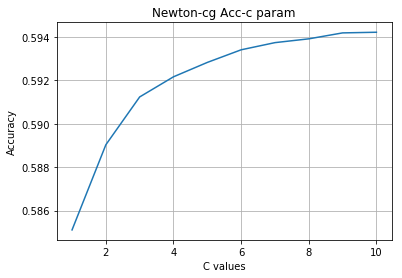

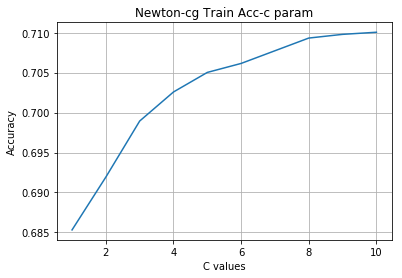

In [10]:
# Test regression for different parameter
# Solver changed in order to take individual results for every solver
# for simplicity only one code is presented. (but all solvers were tested with multiple ranges- more results in report)
logr_acc=[]
c_values=[] 
train_acc_val=[]
# run logistic regression for multiple values of c and save train and test accuracy as shown below
for c_param in [ x * 1.0 for x in range(1,11,1)] :
    logr = lm.LogisticRegression(penalty='l2' ,C = c_param , solver = 'newton-cg' ,multi_class = 'multinomial', max_iter = 10000,tol = 1e-3, verbose=2)
    logr.fit(X_train,y_train)
    yhat = logr.predict(X_test)
    logr_accuracy = np.mean(y_test == yhat)
    logr_acc.append(logr_accuracy)
    c_values.append(c_param)
    #print("Logistic Regression Accuracy: %f" % logr_accuracy)
    yhat_train = logr.predict(X_train)
    train_acc_val.append(np.mean(y_train == yhat_train))
print("Accuracy of Newton-cg for different values of c")

fig = plt.figure()
#plt.subplot(1, 2, 1)
plt.title("Newton-cg Acc-c param")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.plot(c_values,logr_acc)
plt.grid()
plt.savefig('accuracy_c_newton1.png')
plt.show()
#plt.legend(["Train acc","Test acc"])
fig = plt.figure()
#plt.subplot(1, 2, 2)
plt.title("Newton-cg Train Acc-c param")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.plot(c_values,train_acc_val)
plt.grid()
plt.savefig('train_accuracy_c_newton1.png')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/tpv/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s finished


Logistic Regression Accuracy: 0.585108


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s finished


Logistic Regression Accuracy: 0.585108


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


Logistic Regression Accuracy: 0.585108


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


Logistic Regression Accuracy: 0.585110


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Logistic Regression Accuracy: 0.585096


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Logistic Regression Accuracy: 0.585098


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Logistic Regression Accuracy: 0.582901


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Logistic Regression Accuracy: 0.582901


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


Logistic Regression Accuracy: 0.582901


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


Logistic Regression Accuracy: 0.579121


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


Logistic Regression Accuracy: 0.579121


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Logistic Regression Accuracy: 0.579402


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Logistic Regression Accuracy: 0.579402


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


Logistic Regression Accuracy: 0.552469


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


Logistic Regression Accuracy: 0.552469
Accuracy of Newton-cg for different values of tolerance


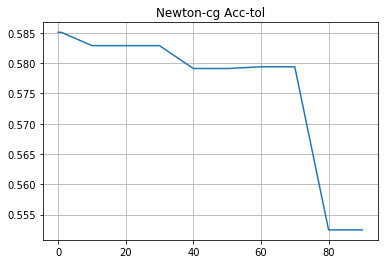

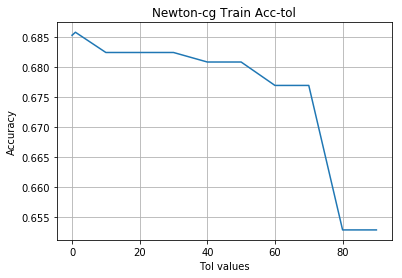

In [11]:
# Test regression for different values of tolerance
# Solver changed in order to take individual results for every solver
# for simplicity only one code is presented. (but all solvers were tested with multiple ranges- more results in report)
logr_acc=[]
tol_values=[]
train_acc_val=[]
# run logistic regression for multiple values of tolerance and save train and test accuracy as shown below
for tolerance in [1e-12,1e-6,1e-3,0.01,0.1,1,10,20,30,40,50,60,70,80,90]:
    logr = lm.LogisticRegression(penalty='l2' ,C = 1.0,solver = 'newton-cg', multi_class = 'multinomial', max_iter = 10000,tol = tolerance, verbose=2)
    logr.fit(X_train,y_train)
    yhat = logr.predict(X_test)
    logr_accuracy = np.mean(y_test == yhat)
    logr_acc.append(logr_accuracy)
    tol_values.append(tolerance)
    yhat_train = logr.predict(X_train)
    train_acc_val.append(np.mean(y_train == yhat_train))
    print("Logistic Regression Accuracy: %f" % logr_accuracy)
    
print("Accuracy of Newton-cg for different values of tolerance")
fig = plt.figure()
#plt.subplot(1, 2, 1)
plt.title("Newton-cg Acc-tol")
#plt.plot(tol_values,train_acc_val)
plt.plot(tol_values,logr_acc)
plt.grid()
plt.savefig('accuracy_tol_newton.png')
plt.show()
#plt.legend(["Train acc","Test acc"])
fig = plt.figure()
#plt.subplot(1, 2, 2)
plt.title("Newton-cg Train Acc-tol")
plt.xlabel("Tol values")
plt.ylabel("Accuracy")
plt.plot(tol_values,train_acc_val)
plt.grid()
plt.savefig('train_accuracy_tol_newton.png')
plt.show()

In [14]:
# Logistic Discriminant Analysis
# Warning: calculate priors_calc=y_train.value_counts()/y_train.shape[0]
# priors=[0.14285,0.14285,0.14285,0.14285,0.14285,0.14285,0.1429]

import time
start = time.clock()
lda=da.LinearDiscriminantAnalysis(tol = 1e-3)
lda.fit(X_train,y_train)

yhat=lda.predict(X_test)
print ("Time for train and predict ",time.clock() - start)
lda_acc=np.mean(y_test==yhat)
print("Accuracy LDA: %f" % lda_acc)

/home/tpv/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Time for train and predict  1.8565240000000358
Accuracy LDA: 0.581252


In [15]:
# Logistic Discriminant Analysis with priors
lda=da.LinearDiscriminantAnalysis(tol = 1e-3,solver='lsqr', priors=[0.14285,0.14285,0.14285,0.14285,0.14285,0.14285,0.1429])
lda.fit(X_train,y_train)
#print (time.clock() - start)
yhat=lda.predict(X_test)
lda_acc=np.mean(y_test==yhat)
print("Accuracy LDA: %f" % lda_acc)

Accuracy LDA: 0.581252
